In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

EXACT_DIR1 = os.path.join("results/exact-20k-batch-8/")
EXACT_DIR2 = os.path.join("results/exact-50k-batch-32/")
FOU_DIR = os.path.join("results/fourier-50k-batch-32/")

In [99]:
df1

,Wall time,Step,Value
0,1.678613e+09,0,6314.743164
1,1.678613e+09,1000,1595.619385
2,1.678615e+09,10000,1235.645264
3,1.678615e+09,11000,1201.417236
4,1.678615e+09,12000,1033.478882
5,1.678615e+09,13000,927.102051
6,1.678615e+09,14000,504.504974
7,1.678615e+09,15000,480.043976
8,1.678616e+09,16000,507.263550
9,1.678616e+09,17000,525.034241


In [46]:
l = min(len(df1), len(df2))
df1.columns

Index(['Wall time', 'Step', 'Value'], dtype='object')

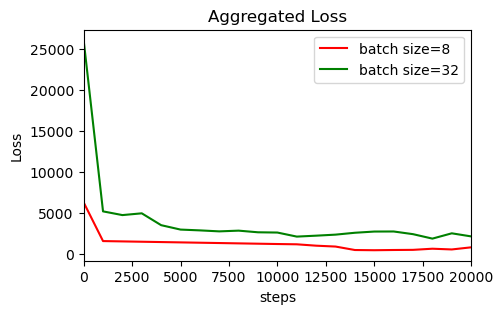

In [100]:
df1 = pd.read_csv(f"{EXACT_DIR1}/loss_agg.csv")
df2 = pd.read_csv(f"{EXACT_DIR2}/loss_agg.csv")
plt.figure(figsize=(5, 3))
plt.title("Aggregated Loss")
plt.plot(df1["Step"][:l], df1["Value"][:l], label="batch size=8", color="red")
plt.plot(df2["Step"], df2["Value"], label="batch size=32", color="green")
plt.xlabel("steps")
plt.ylabel("Loss")
plt.xlim(0, df1["Step"].values[-1])
plt.legend()
plt.savefig("results/agg_batch.png")
plt.show()

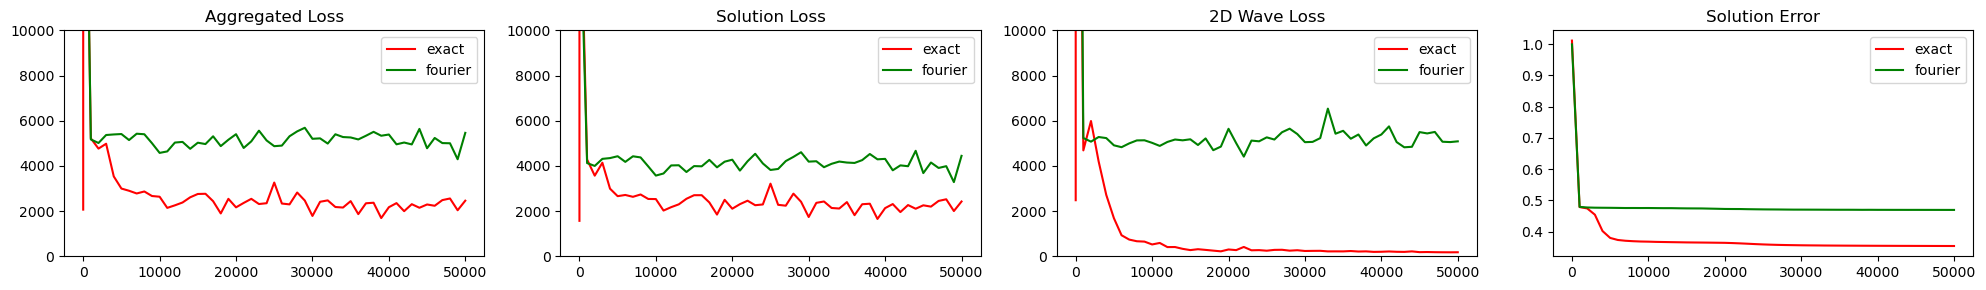

In [94]:
files = [fname for fname in os.listdir(EXACT_DIR2) if fname.endswith("csv")]
fig, ax = plt.subplots(nrows=1, ncols=len(files), figsize=(20, 3))
titles = {
    "loss_agg.csv": "Aggregated Loss",
    "loss_sol.csv": "Solution Loss",
    "loss_wave.csv": "2D Wave Loss",
    "sol_err.csv": "Solution Error"
}
for i, fname in enumerate(files):
    f1 = os.path.join(EXACT_DIR2, fname)
    f2 = os.path.join(FOU_DIR, fname)
    df1 = pd.read_csv(f1)
    df2 = pd.read_csv(f2)
    title = titles[fname]
    ax_ = ax[i]
    ax_.set_title(title)
    ax_.plot(df1["Step"], df1["Value"], label="exact", color="red")
    ax_.plot(df2["Step"], df2["Value"], label="fourier", color="green")
    if title != "Solution Error":
        ax_.set_ylim(0, 10000)
    ax_.legend()
plt.tight_layout()
plt.savefig("results/losses.png")
plt.show()

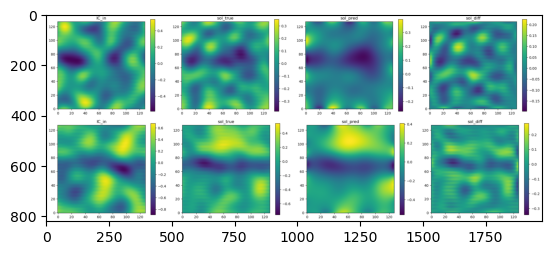

In [118]:
import numpy as np
from PIL import Image

img1 = np.asarray(Image.open(f"{FOU_DIR}/test_prediction_0.png"))
img2 = np.asarray(Image.open(f"{FOU_DIR}/test_prediction_1.png"))

h, w = min(img1.shape[0], img2.shape[0]), min(img1.shape[1], img2.shape[1])
img = np.vstack([img1[:h, :w], img2[:h, :w]])
img = Image.fromarray(img)
plt.imshow(img)
img.save(f"{FOU_DIR}/fourier.png")